# Answering the Science Question

This notebook serves as a demo for answering the science question underlying the design of my Labrador Sea regional model.

The science question for my model is: **What does surface temperature variability tell us about the potential for deep water formation in the Labrador Sea?**

First, import packages to re-create and visualize the model fields here:

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

Next, define the location of the project directory for the model:

In [2]:
# define the input directory
project_dir = r'C:\Users\benja\SJSU\CS185C\Project'

Then, re-create the model grid

In [3]:
delX = 1/15
delY = 1/15
xgOrigin = -65
ygOrigin = 50
n_rows = 231
n_cols = 381

# recreate the grids that will be used in the model
xc = np.arange(xgOrigin+delX/2, xgOrigin+n_cols*delX, delX)
yc = np.arange(ygOrigin+delY/2, ygOrigin+n_rows*delY, delY)
XC, YC = np.meshgrid(xc, yc)

## What does surface temperature variability tell us about the potential for deep water formation in the Labrador Sea?



In [4]:
file_winter = os.path.join(project_dir,'run','diags', 'TS_surf_daily_mean', 'TS_surf_daily_mean.0000182292.data')
file_summer = os.path.join(project_dir,'run','diags', 'TS_surf_daily_mean', 'TS_surf_daily_mean.0000091116.data')

In [5]:
def load_sst(file_path):
    grid = np.fromfile(file_path, '>f4').reshape((2, n_rows, n_cols))
    return grid[0]

sst_winter = load_sst(file_winter)
sst_summer = load_sst(file_summer)

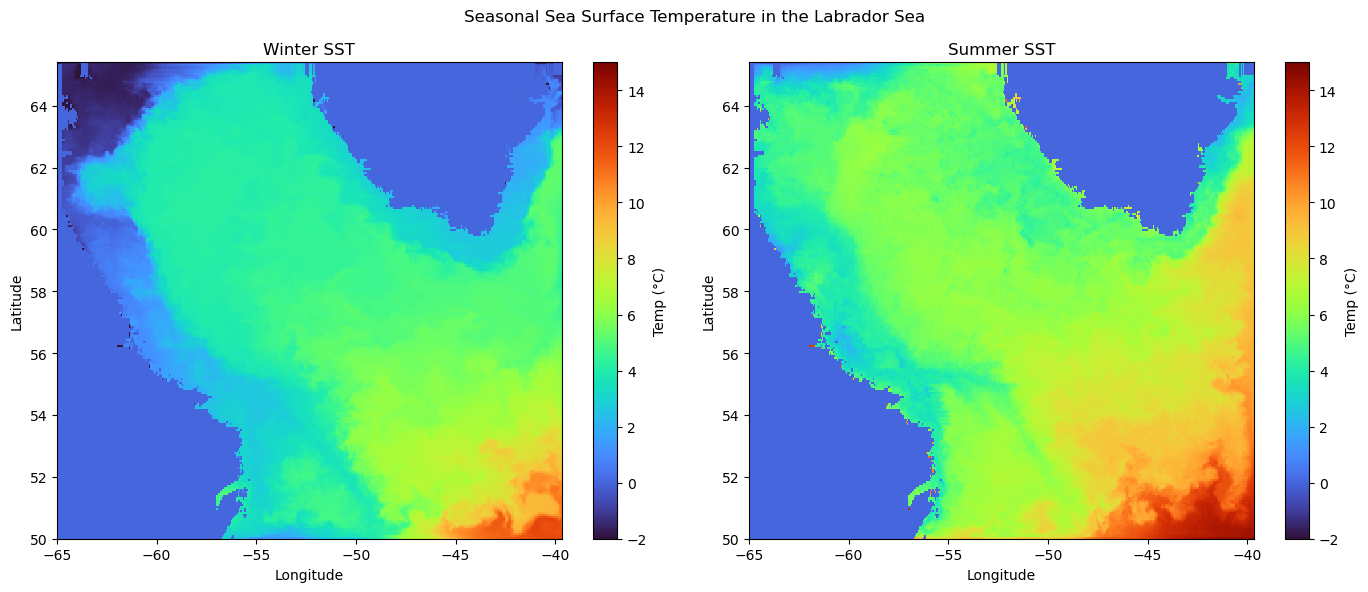

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

im1 = axs[0].pcolormesh(XC[:,:-1], YC[:,:-1], sst_winter[:,:-1], cmap='turbo', vmin=-2, vmax=15)
axs[0].set_title('Winter SST')
axs[0].set_xlabel('Longitude')
axs[0].set_ylabel('Latitude')
plt.colorbar(im1, ax=axs[0], label='Temp (°C)')

im2 = axs[1].pcolormesh(XC[:,:-1], YC[:,:-1], sst_summer[:,:-1], cmap='turbo', vmin=-2, vmax=15)
axs[1].set_title('Summer SST')
axs[1].set_xlabel('Longitude')
axs[1].set_ylabel('Latitude')
plt.colorbar(im2, ax=axs[1], label='Temp (°C)')

plt.suptitle('Seasonal Sea Surface Temperature in the Labrador Sea')
plt.tight_layout()
plt.show()

- In winter, surface waters cool dramatically across the region, with temperatures approaching or below 0°C. Cold surface water is dense, which increases the chance that it will sink and mix with deeper layers which is a key condition for deep water formation through convection.

- In summer, the surface warms significantly, especially near the southeastern boundary. This creates a warm, buoyant surface layer that sits on top of cooler, denser water. This kind of temperature layering called stratification and it acts like a lid that prevents vertical mixing.

These seasonal changes show that deep water formation is most likely in winter, when the ocean loses heat and surface waters become dense enough to sink. In summer, surface warming prevents this process by increasing stratification. This analysis confirms that seasonal SST variability plays a key role in enabling or suppressing deep convection in the Labrador Sea. While this doesn't directly include freshwater input, it provides a foundation for understanding when and where deep water formation is physically possible.

## Mixed Layer Depth (MLD) Time Series and Map

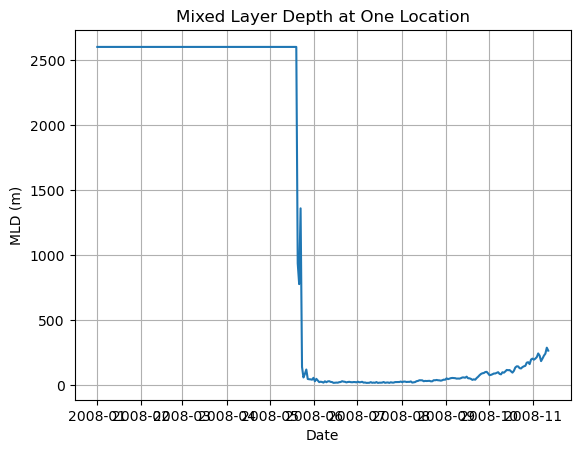

In [7]:
row = 150
col = 100
deltaT = 150

def iter_to_date(iter_number):
    return datetime(2008,1,1) + timedelta(seconds=iter_number * deltaT)

dates, mld_values = [], []
folder = os.path.join(project_dir,'run','diags', 'MXL_day_snap')
for fname in sorted(os.listdir(folder)):
    if fname.endswith('.data'):
        iter_num = int(fname.split('.')[-2])
        mld = np.fromfile(os.path.join(folder, fname), '>f4').reshape(n_rows, n_cols)
        dates.append(iter_to_date(iter_num))
        mld_values.append(mld[row, col])

plt.plot(dates, mld_values)
plt.title('Mixed Layer Depth at One Location')
plt.ylabel('MLD (m)')
plt.xlabel('Date')
plt.grid(True)
plt.show()

Deep water formation occurs during winter and early spring, when cold and dense surface water mixes down into the deep ocean (MLD ~2600 m). During summer, warming and stratification limit vertical mixing, leading to a shallow mixed layer. The MLD starts to deepen again in the fall, setting the stage for another convection cycle. This pattern supports the idea that deep water formation is tightly linked to seasonal changes in surface conditions  especially surface temperature and possibly freshwater input.

## Vertical Temperature & Salinity Section

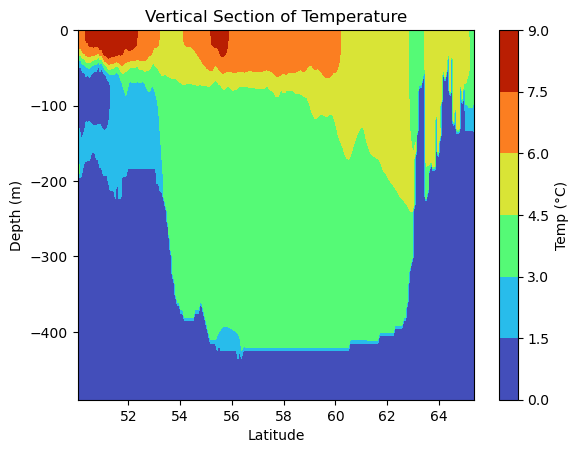

In [8]:
def load_3d_field(path, shape):
    return np.fromfile(path, '>f4').reshape(shape)

z_levels = 50
section_col = 190

file = os.path.join(project_dir,'run','diags', 'TS_3D_mon_mean', 'TS_3D_mon_mean.0000167616.data')
ts = load_3d_field(file, (2, z_levels, n_rows, n_cols))

theta = ts[0, :, :, section_col]
salt = ts[1, :, :, section_col]
depths = np.arange(z_levels) * 10

plt.contourf(yc, -depths, theta, cmap='turbo')
plt.title('Vertical Section of Temperature')
plt.ylabel('Depth (m)')
plt.xlabel('Latitude')
plt.colorbar(label='Temp (°C)')
plt.show()

### What the Temperature Section Shows

- Strong vertical stratification in the upper ~150 m

  - Surface waters are warm (6–9°C) at the southern end (~51–54°N), decreasing northward and with depth.

  - Below around 100–200 m, the temperature is much cooler (around 2–3°C), especially in the central and northern Labrador Sea.

- Deep mixed layer in central latitudes (~54–60°N)

  - Temperature is nearly uniform with depth in this zone, indicating deep vertical mixing.

  - Matches the MLD time series where deep convection likely occurred here earlier in the season.

- Southern and northern edges show more stratification

  - Warm surface cap over cooler deeper water.

  - Likely areas of weaker convection or stronger stratification, possibly influenced by boundary currents or freshwater input.

In the central region, vertical temperature is nearly uniform down to ~450 m, suggesting recent deep convection. Toward the southern and northern ends, temperature decreases more steeply with depth, indicating stronger stratification that limits mixing. The warm surface layer near 51–54°N may reflect summer heating or freshwater effects that stabilize the water column. This confirms that the central Labrador Sea is the primary region of deep water formation, while lateral regions are more resistant to vertical mixing.

## Where and when does deep convection happen in the Labrador Sea?

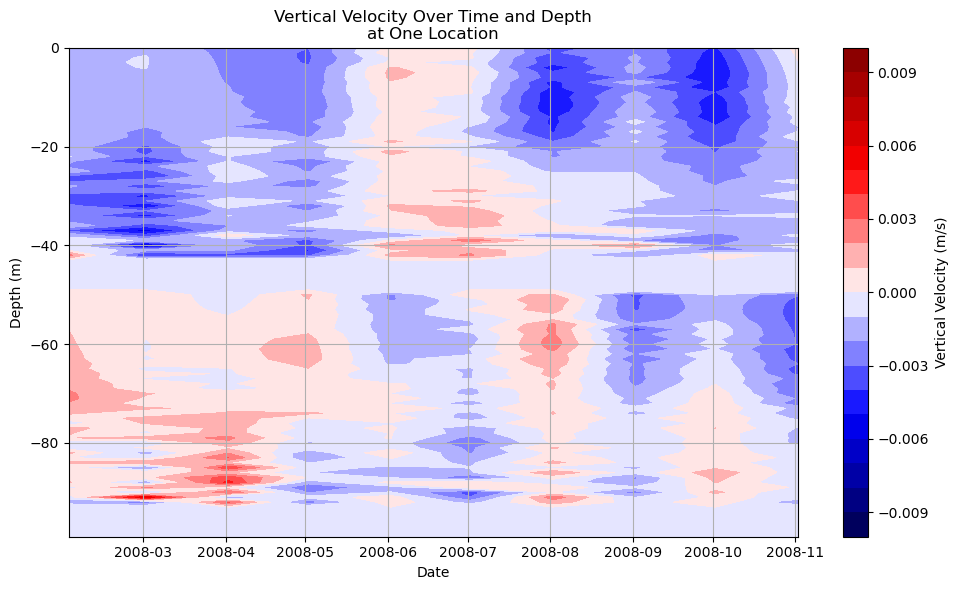

In [9]:
n_rows = 231
n_cols = 381
z_levels = 100
deltaT = 150

row = 150
col = 190

vel_dir = os.path.join(project_dir, 'run', 'diags', 'vel_3D_mon_snap')

dates = []
w_time_depth = []

def iter_to_date(iter_number):
    return datetime(2008, 1, 1) + timedelta(seconds=iter_number * deltaT)

for fname in sorted(os.listdir(vel_dir)):
    if fname.endswith('.data'):
        iter_num = int(fname.split('.')[-2])
        dates.append(iter_to_date(iter_num))

        file_path = os.path.join(vel_dir, fname)
        w_flat = np.fromfile(file_path, '>f4')

        if len(w_flat) == z_levels * n_rows * n_cols:
            w = w_flat.reshape((z_levels, n_rows, n_cols))
        elif len(w_flat) == 3 * z_levels * n_rows * n_cols:
            w = w_flat.reshape((3, z_levels, n_rows, n_cols))[2]
        else:
            continue

        w_col = w[:, row, col] / 100.0
        w_time_depth.append(w_col)

w_time_depth = np.array(w_time_depth).T

depths = np.arange(z_levels)

plt.figure(figsize=(10, 6))
c = plt.contourf(dates, -depths, w_time_depth, cmap='seismic', levels=np.linspace(-0.01, 0.01, 21))
plt.colorbar(c, label='Vertical Velocity (m/s)')
plt.title('Vertical Velocity Over Time and Depth\nat One Location')
plt.xlabel('Date')
plt.ylabel('Depth (m)')
plt.grid(True)
plt.tight_layout()
plt.show()

Deep water formation in the Labrador Sea is seasonal, occurring primarily in late winter and early spring. During this time, surface cooling removes buoyancy, allowing dense surface water to sink, as seen in the negative vertical velocities. In summer, surface heating and freshwater input stabilize the upper ocean, suppressing vertical motion and resulting in stratified conditions. Vertical mixing starts to reappear in fall, but full convection likely resumes in winter.